In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from pryngles import *
from pryngles import pixx
import time
extension="pixx"
#extension="cpixx"
import multiprocessing as mp
import os,sys,glob

# Import local functions
import extra_func as efunc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'pixx' from 'pryngles' (/Users/jorgezuluagacallejas/.virtualenvs/pryngles-lab/lib/python3.9/site-packages/pryngles/__init__.py)

In [3]:
def FandP(alpha,sigma):
    delta  = (1-sigma)/(1+sigma/2)
    deltal = (1-2*sigma)/(1-sigma)
    F11 = delta*(3/4)*(1+np.cos(alpha)**2)+(1-delta)
    P = np.sin(alpha)**2/(1+np.cos(alpha)**2 + 2*sigma/(1-sigma))
    return F11,P

<IPython.core.display.Javascript object>


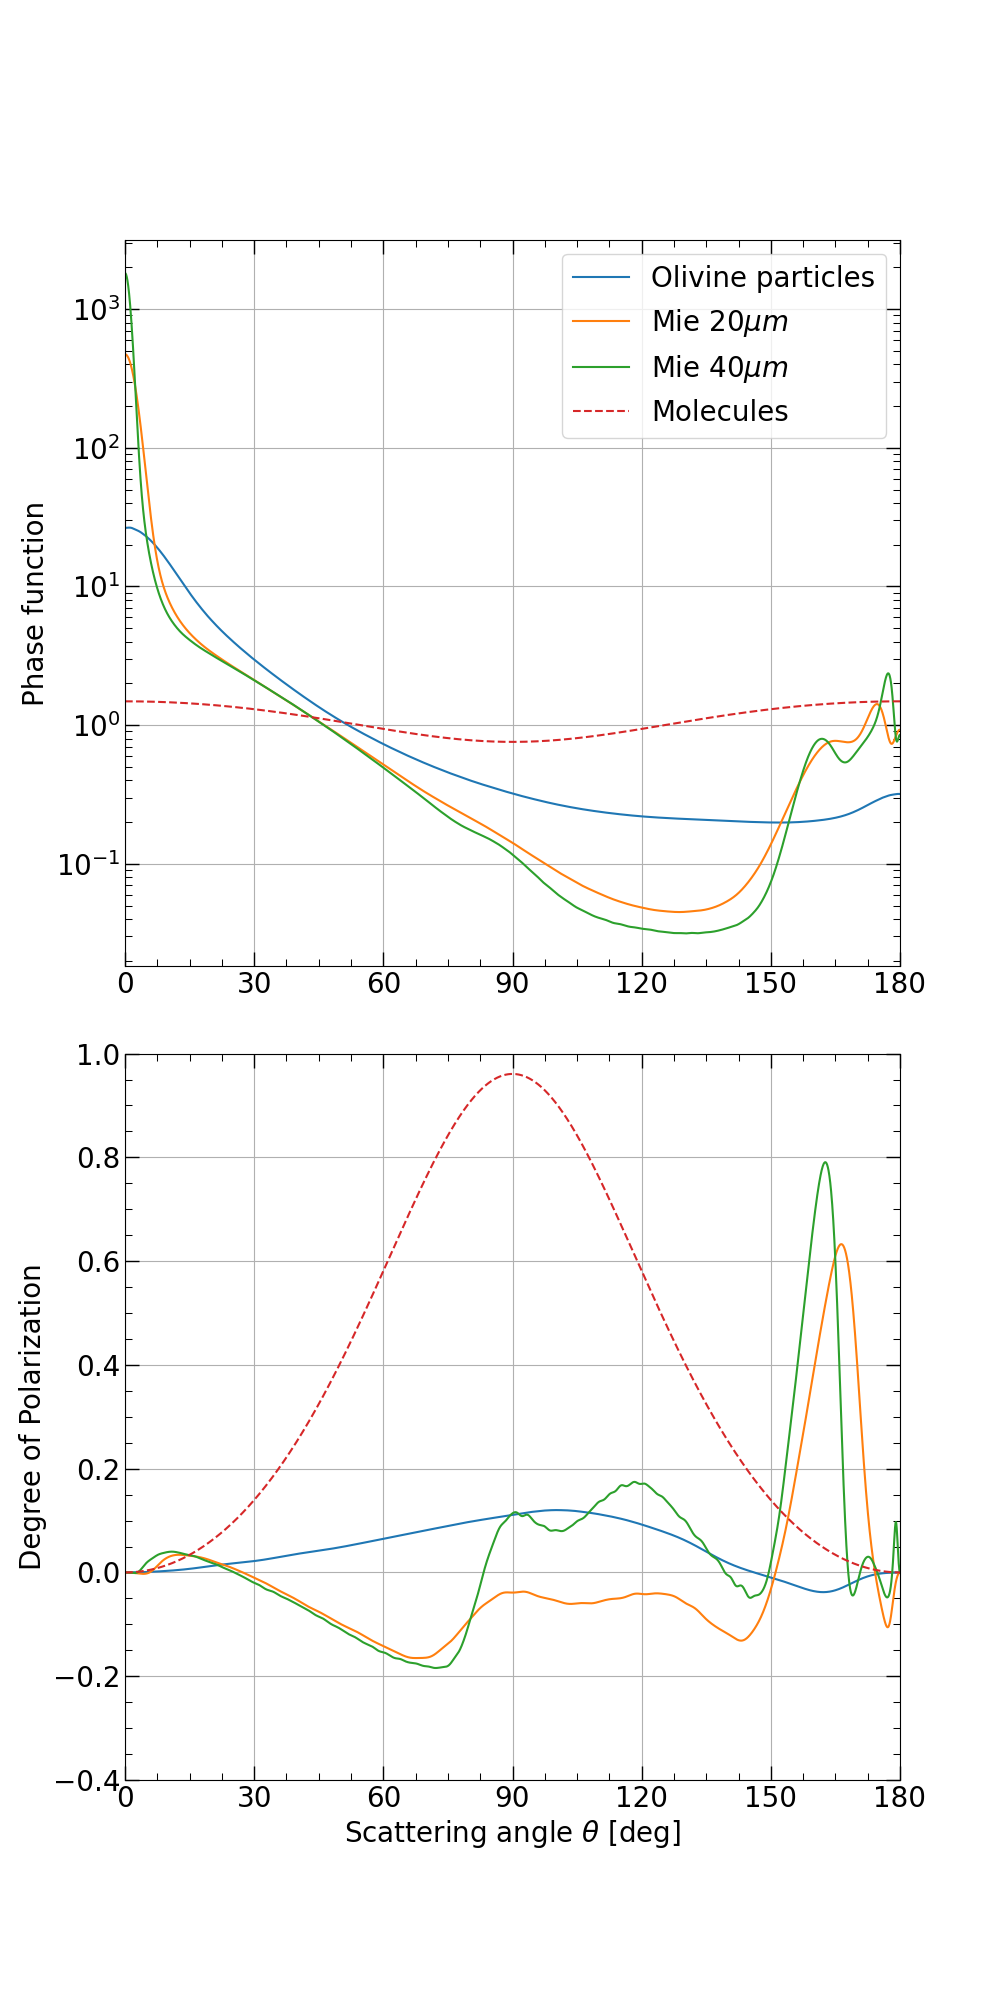

0.1984253
Average before:  2.4411797606026107
Average after:  0.9999999999999999
0.04488844
Average before:  8.882968852385448
Average after:  1.0
0.03149209
Average before:  16.764138093129688
Average after:  0.9999999999999999
Average:  1.121323514851485


In [4]:
plt.rcParams.update({'font.size': 20})
names = np.array(["s5.sc.F.dat", "20mu_4500_1.5.dat","40mu_4500_1.5.dat"])#"5mu_1000_1.6.dat", "5mu_3000_1.6.dat"])
plot_names = np.array(["Olivine particles", "Mie $20 \mu m$", "Mie $40 \mu m$"])#"Mie $5 \mu m$","Mie $5 \mu m$ 3000"])

fig = plt.figure(figsize=(10,20))
gs = fig.add_gridspec(2,1, hspace=0.12)
ax = gs.subplots(sharex=False)

for ii,name in enumerate(names):
    scattering_matrix_name = f"./Matrices/{name}"
    angle = []
    F11   = []
    F22   = []
    F33   = []
    F44   = []
    F12   = []
    F34   = []
    POL   = []

    for line in open(scattering_matrix_name).readlines():
        sp = line.split()
        angle += [float(sp[0])]
        F11   += [float(sp[1])]
        F22   += [float(sp[2])]
        F33   += [float(sp[3])]
        F44   += [float(sp[4])]
        F12   += [float(sp[5])]
        F34   += [float(sp[6])]
        POL   += [float(sp[7])]

    df = pd.DataFrame({"Angle": angle, "F11": F11, "F22": F22, "F33": F33,
                       "F44": F44, "F12": F12, "F34": F34, "POL": POL})

    print(np.min(df["F11"]))
    avg = np.sum(df["F11"])/len(df["F11"])
    print("Average before: ",avg)
    F11 = df["F11"]/avg
    print("Average after: ",np.sum(F11)/len(F11))

    ax[0].plot(df["Angle"], df["F11"],label=plot_names[ii])

    ax[1].plot(df["Angle"], df["POL"], label=plot_names[ii])

theta = np.linspace(0,np.pi,10000)
sigma = 0.02
F11,P = FandP(theta,sigma)
print("Average: ",np.sum(F11)/len(F11))
ax[0].plot(theta*180/np.pi,F11,"--",label="Molecules")
ax[1].plot(theta*180/np.pi,P,"--",label="Molecules")

# ax[0].set_xlabel("Scattering angle $\\theta$")
ax[0].set_ylabel("Phase function")
ax[0].set_yscale("log")
ax[0].legend()
# ax[0].legend(loc='upper center', bbox_to_anchor=(1.12, 1.1),
#           ncol=5)
ax[0].grid()
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(30))
ax[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[0].set_xlim([0,180])
efunc.setup(ax[1],30,0,180,0.2,-0.4,1.0,notext=False)
ax[0].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
ax[0].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

ax[1].set_ylabel("Degree of Polarization")
ax[1].set_xlabel("Scattering angle $\\theta$ [deg]")
ax[1].grid()
ax[1].tick_params(which='major', direction='in', length=10, width=1.00, right=True, top=True)
ax[1].tick_params(which='minor', direction='in', length=5, width=0.75, right=True, top=True)

# plt.savefig("/home/allard/Results/single_scattering_incl_mie20_and_40.svg", bbox_inches='tight', format='svg', dpi=1200)
plt.show()

plt.rcParams.update({'font.size': 18})

In [5]:
r_oli = 1e-6
lamb_oli = 633e-9
x_oli = 2*np.pi*r_oli/lamb_oli
print("Size parameter oli: ",x_oli)

r_mie = 5e-6
lamb_mie = 3000e-9
x_mie = 2*np.pi*r_mie/lamb_mie
print("Size parameter mie: ",x_mie)

Size parameter oli:  9.926043139304243
Size parameter mie:  10.471975511965978
